## Building a multi-class decision making classification problem

In [131]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [132]:
## Create a toy multiclass dataset

# Import the dataset

from sklearn.datasets import make_blobs

# Set the hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
NUM_SAMPLES = 2000

# Create the dataset

X, y = make_blobs(n_samples=NUM_SAMPLES, centers=NUM_CLASSES, n_features=NUM_FEATURES, random_state=RANDOM_SEED, cluster_std=1.6)

# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)


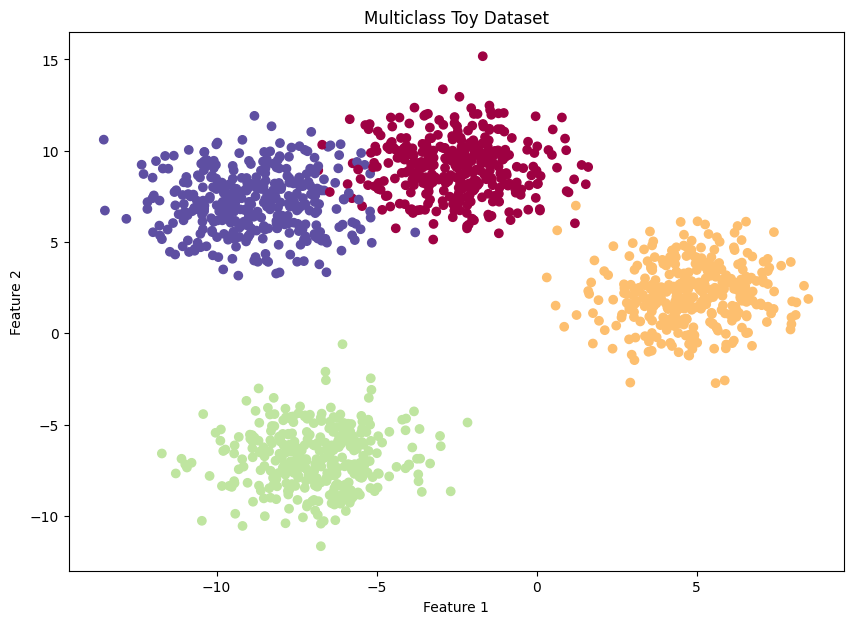

In [133]:
# Visualize the dataset

plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title('Multiclass Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [134]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the dataset to PyTorch tensors

X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)


In [135]:
# creating the neural network

class NeuralNet(nn.Module):
  def __init__(self, num_features = 2, num_classes = 4, first_layer_size = 64, second_layer_size = 32):
    super(NeuralNet, self).__init__()
    # self.first_layer = nn.Linear(num_features, first_layer_size)
    # self.second_layer = nn.Linear(first_layer_size, second_layer_size)
    # self.output_layer = nn.Linear(second_layer_size, num_classes)
    # self.relu = nn.ReLU()
    # self.softmax = nn.Softmax(dim=1)

    self.linear_relu_stack = nn.Sequential(
      nn.Linear(num_features, first_layer_size),
      nn.Sigmoid(),
      nn.Linear(first_layer_size, second_layer_size),
      nn.Sigmoid(),
      nn.Linear(second_layer_size, num_classes),
      nn.Softmax(dim=1)
    )

  def forward(self, x):
    return self.linear_relu_stack(x)

In [136]:
# Instantiate the model

model_0 = NeuralNet(num_features=NUM_FEATURES, num_classes=NUM_CLASSES).to(device)

### Getting prediction probabilieties for a multiclass classification problem
 In order to evaluate and train our model we need to convert our model's outpuls (logits) to prediction probabilities and then to prediction labels

 Logits -> Pred probs (torch.softmax) -> Pred labels (take the argma of the proababilities)

In [137]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_train.to(device))

y_logits[:10]

tensor([[0.1599, 0.2129, 0.4312, 0.1960],
        [0.1582, 0.2091, 0.4413, 0.1914],
        [0.1602, 0.2139, 0.4283, 0.1976],
        [0.1577, 0.2092, 0.4407, 0.1924],
        [0.1488, 0.2133, 0.4499, 0.1880],
        [0.1549, 0.2074, 0.4488, 0.1890],
        [0.1563, 0.2080, 0.4458, 0.1900],
        [0.1598, 0.2105, 0.4366, 0.1931],
        [0.1599, 0.2120, 0.4330, 0.1951],
        [0.1599, 0.2127, 0.4315, 0.1959]])

In [138]:


y_probs = F.softmax(y_logits, dim=1)

y_probs[:10]



tensor([[0.2271, 0.2395, 0.2979, 0.2355],
        [0.2266, 0.2384, 0.3008, 0.2342],
        [0.2272, 0.2398, 0.2971, 0.2359],
        [0.2265, 0.2384, 0.3006, 0.2345],
        [0.2243, 0.2393, 0.3031, 0.2333],
        [0.2257, 0.2379, 0.3028, 0.2336],
        [0.2261, 0.2381, 0.3020, 0.2338],
        [0.2270, 0.2388, 0.2994, 0.2347],
        [0.2271, 0.2392, 0.2984, 0.2352],
        [0.2271, 0.2394, 0.2980, 0.2354]])

In [139]:
y_preds = torch.argmax(y_probs, dim=1)
y_preds[:10]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [140]:
# Fit the multiclass classification model to the data
torch.manual_seed(RANDOM_SEED)
# Set the hyperparameters

LEARNING_RATE = 0.08
NUM_EPOCHS = 5000
LOSS_FUNC = nn.CrossEntropyLoss()
OPTIMIZER = torch.optim.SGD(model_0.parameters(), lr=LEARNING_RATE)

#display the model

print(model_0)
print(model_0.linear_relu_stack)
print(model_0.state_dict())

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

NeuralNet(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=32, out_features=4, bias=True)
    (5): Softmax(dim=1)
  )
)
Sequential(
  (0): Linear(in_features=2, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=32, out_features=4, bias=True)
  (5): Softmax(dim=1)
)
OrderedDict({'linear_relu_stack.0.weight': tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802],
        [-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260],
        [-0.1997, -0.4252],
        [ 0.0667, -0.6984],
   

In [141]:
# define accuracy function

def model_accuracy(y_pred, y_true):
  return (y_pred == y_true).sum().item() / y_true.shape[0]

In [142]:
# Train the model

for epoch in range(NUM_EPOCHS):
  model_0.train()
  
  y_logits = model_0(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  

  loss = LOSS_FUNC(y_logits, y_train)

  OPTIMIZER.zero_grad()
  
  loss.backward()
  
  OPTIMIZER.step()

  #test the model
  model_0.eval()
  with torch.inference_mode():
    test_logits  = model_0(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = LOSS_FUNC(test_logits, y_test)

  if (epoch - 1) % 10 == 0:
    train_acc = model_accuracy(y_true = y_train, y_pred = y_pred)
    test_acc = model_accuracy(y_true = y_test, y_pred = test_preds)
    print(f'Epoch [{epoch - 1}/{NUM_EPOCHS}], Loss: {loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Epoch [0/5000], Loss: 1.3976, Test Loss: 1.3937, Train Accuracy: 0.2450, Test Accuracy: 0.2617
Epoch [10/5000], Loss: 1.3908, Test Loss: 1.3880, Train Accuracy: 0.2450, Test Accuracy: 0.2617
Epoch [20/5000], Loss: 1.3854, Test Loss: 1.3834, Train Accuracy: 0.2450, Test Accuracy: 0.2617
Epoch [30/5000], Loss: 1.3810, Test Loss: 1.3795, Train Accuracy: 0.2450, Test Accuracy: 0.2617
Epoch [40/5000], Loss: 1.3770, Test Loss: 1.3760, Train Accuracy: 0.2450, Test Accuracy: 0.2617
Epoch [50/5000], Loss: 1.3732, Test Loss: 1.3725, Train Accuracy: 0.2450, Test Accuracy: 0.2617
Epoch [60/5000], Loss: 1.3695, Test Loss: 1.3690, Train Accuracy: 0.4321, Test Accuracy: 0.4500
Epoch [70/5000], Loss: 1.3658, Test Loss: 1.3655, Train Accuracy: 0.4950, Test Accuracy: 0.5483
Epoch [80/5000], Loss: 1.3619, Test Loss: 1.3617, Train Accuracy: 0.7507, Test Accuracy: 0.7467
Epoch [90/5000], Loss: 1.3579, Test Loss: 1.3577, Train Accuracy: 0.7507, Test Accuracy: 0.7467
Epoch [100/5000], Loss: 1.3535, Test Loss

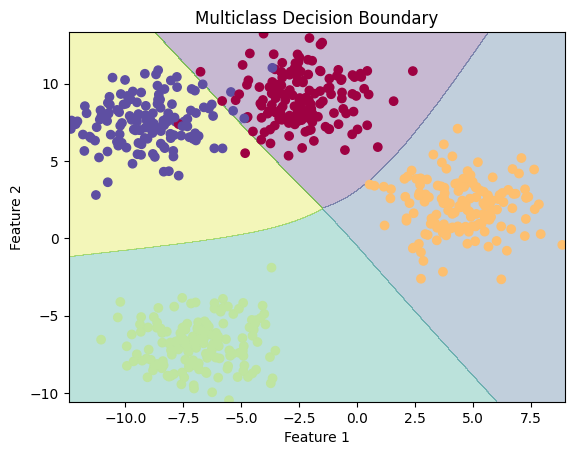

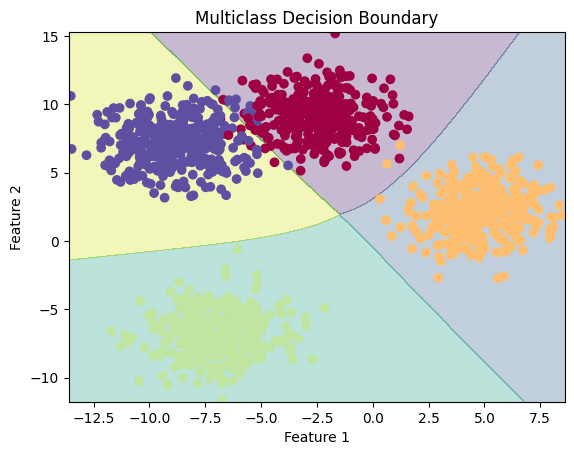

In [143]:
#Visualize the model boundaries and predictions

def plot_multiclass_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01), torch.arange(y_min, y_max, 0.01))
  Z = model(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))
  Z = torch.argmax(Z, dim=1)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
  plt.title('Multiclass Decision Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

plot_multiclass_decision_boundary(model_0, X_test, y_test)

plot_multiclass_decision_boundary(model_0, X_train, y_train)

## A few more classification metrics

Evaluating a model is just as important as training and building the model.

* Accuracy - out of 100 samples, how many does the model gets right
* Precision - false positives
* Recall - false negatives
* F1-score -
* Confusion matrix
* Calssification recall

In [149]:
# from torchmetrics import Accuracy, Precision, Recall

# #Setup metrics

# torchmeric_acc = Accuracy(y_pred, y_test)